In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Regresyon Analizi Nedir-Neden İhtiyaç Duyarız ? 
* Regresyon analizi, iki ya da daha çok değişken arasındaki ilişkiyi ölçmek için kullanılan analiz metodudur. Eğer tek bir değişken kullanılarak analiz yapılıyorsa buna tek değişkenli regresyon, birden çok değişken kullanılıyorsa çok değişkenli regresyon analizi olarak isimlendirilir. Regresyon analizi ile değişkenler arasındaki ilişkinin varlığı, eğer ilişki var ise bunun gücü hakkında bilgi edinilebilir.
* Örneğin, bir ziraat mühendisi buğday verimi ve gübre miktarı arasındaki ilişkiyi, bir mühendis, basınç ve sıcaklık, bir ekonomist gelir düzeyi ve tüketim harcamaları, bir eğitimci öğrencilerin devamsızlık gösterdiği gün sayıları ve başarı dereceleri arasındaki ilişkiyi bilmek isteyebilir. Regresyon, iki (ya da daha çok) değişken arasındaki doğrusal ilişkinin fonksiyonel şeklini, biri bağımlı diğeri bağımsız değişken olarak bir doğru denklemi olarak göstermekle kalmaz, değişkenlerden birinin değeri bilindiğinde diğeri hakkında kestirim yapılmasını sağlar. Genellikle bu iki (veya çok) değişkenlerin hepsinin niceliksel ölçekli olması zorunluluğu vardır.

* Regresyonda, değişkenlerden biri bağımlı diğerleri bağımsız değişken olmalıdır. Buradaki mantık eşitliğin solunda yer alan değişkenin sağında yer alan değişkenlerden etkilenmesidir. Sağda yer alan değişkenlerse diğer değişkenlerden etkilenmemektedir. Burada etkilenmemek matematiksel anlamda bu değişkenleri bir doğrusal denkleme koyduğumuzda etki yapması anlamındadır.
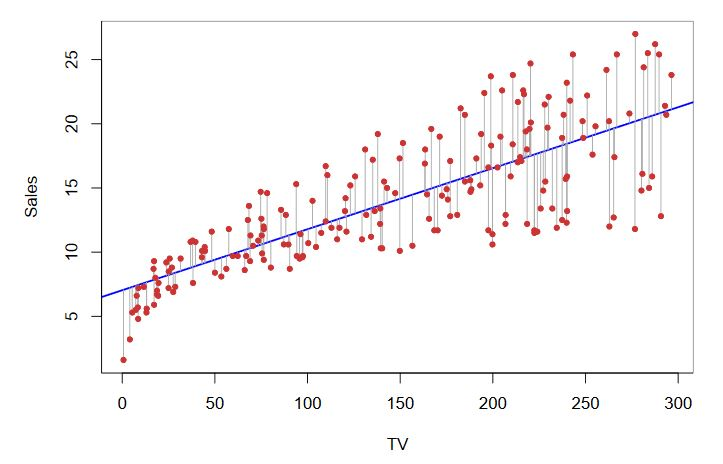

## Regresyon Parametreleri
* Y = Bağımlı değişkenler tarafından etkilenen değişkendir.
* X = Bağımlı değişkenleri etkileyen değişkenlerdir.
* B0 = Oluşturduğumuz modelin kesim noktasıdır.Sabit olarak da adlandırılır.
* Bi = Fit ettiğimiz regresyon eğrisinin eğimidir.
* Epsilon = Tahmin ettiğimiz değerlerle gerçek değerler arasındaki farktır.Artıklar da diyebiliriz.

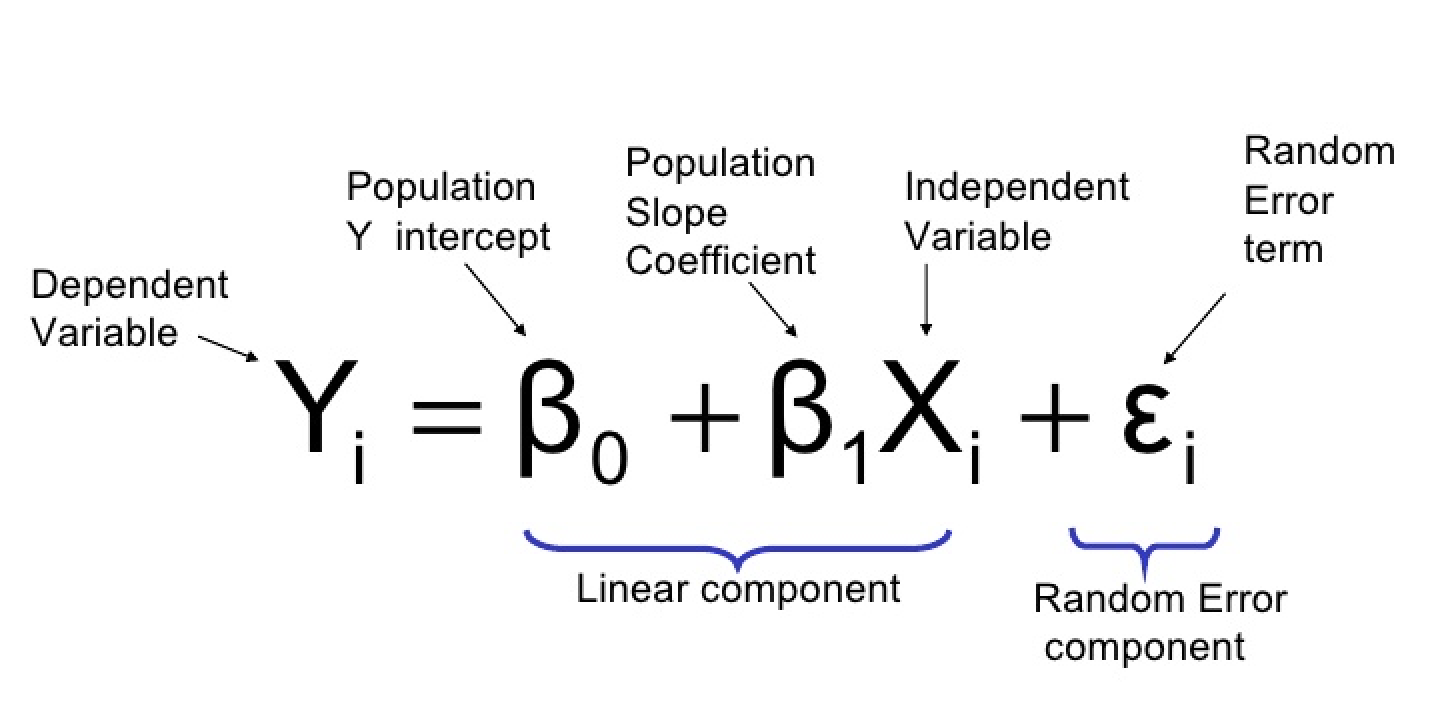

# Kütüphaneler
* Dataframe işlemleri ve veri görselleştirme için gereken kütüphaneler import edildi.Kurulacak modeller için kodların başında import edilecek.

In [ ]:
#Kütüphaneler
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [ ]:
names = ['SUC_ORANİ', 'ARAZİ_ORANİ', 'ISLETME_ORAN', 'NEHIR_KENARI', 'NOX', 'ORT_ODA_SAYISI', 'YAS', 'DIS', 'RAD', 'VERGI', 'OGRNCI_OGRTMN_ORAN', 'B', 'LSTAT', 'ORT_DGR'] 
df = pd.read_csv('/kaggle/input/boston-house-prices/housing.csv',
                      header=None, delim_whitespace=True, names=names) #, delimiter=r"\s+")


In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
def boyut(data):
    print("Satır Sayısı : {}".format(data.shape[0]),"\n",
          "Sütun Sayısı : {}".format(data.shape[1]))
boyut(df)

In [ ]:
df.describe().T

## Değişkenlerin Dağılımları
* Değişkenlerin dağılımı,değişkenlere uygulayacağımız metotlar için önemlidir.Örneğin normal dağılmayan bir veride eksik gözlemlerin doldurulmasında veya aykırı gözlem eliminasyonunda **ortalama** değerini kullanmak hatalı olacaktır çünkü veri çarpık bir dağılıma sahiptir ve ortalaması aykırı bir konumda olabilir. Bu durumda medyan kullanmak daha doğru olacaktır.

In [ ]:
df.hist(bins=12, figsize=(12,10), grid=False);

## Saçılım(Scatter) Grafiği
* Her bir bağımsız değişkenin bağımlı değişken üzerindeki dağılımını görmek değişken seçimi yaparken avantajlı olacaktır.Bu yüzden saçılım grafiği çizdirebiliriz.

In [ ]:
def mult_graph(data):
    sns.regplot(data,df["ORT_DGR"])
    plt.show()
df.apply(mult_graph,axis=0)

# Ev fiyatlarının gruplandırılması

* Ev fiyatları kolonunun max ve min değerleri bulunarak genişliği(R) elde edilir.
* **Sınıf sayısı(k)** = 1+3.3*log(n(satır sayısı))
* Ardından k yuvarlanarak sınıf sayısı bulunur.

In [ ]:
R = max(df["ORT_DGR"])- min(df["ORT_DGR"])
k = 1+3.3*math.log(df.shape[0])
c = round(R/k)
df["UCUZ_PAHALI"] = pd.cut(df["ORT_DGR"],c)
df["UCUZ_PAHALI"] = df["UCUZ_PAHALI"].astype("str")
df["UCUZ_PAHALI"] = df["UCUZ_PAHALI"].replace("(4.955, 27.5]",1)
df["UCUZ_PAHALI"] = df["UCUZ_PAHALI"].replace("(27.5, 50.0]",2)
print(df["UCUZ_PAHALI"].value_counts())

### Gruplandırılmış ev fiyatlarının görselleştirilmesi 

In [ ]:
fig = px.pie(df,values = "ORT_DGR",names = "UCUZ_PAHALI")
fig.show()

# Korelasyon 
Korelasyon, olasılık kuramı ve istatistikte iki rassal değişken arasındaki doğrusal ilişkinin yönünü ve gücünü belirtir.Genel kullanımda bağımsızlıktan ne kadar uzaklaşıldığını gösterir.

**İki değişken arasındaki korelasyon -1 ve 1 arasındadır.**

* Korelasyon katsayısı 1'e yaklaştıkça pozitif yönde doğrusal ilişki artacak,-1'e yaklaştıkça negatif yönde doğrusallık artacaktır.

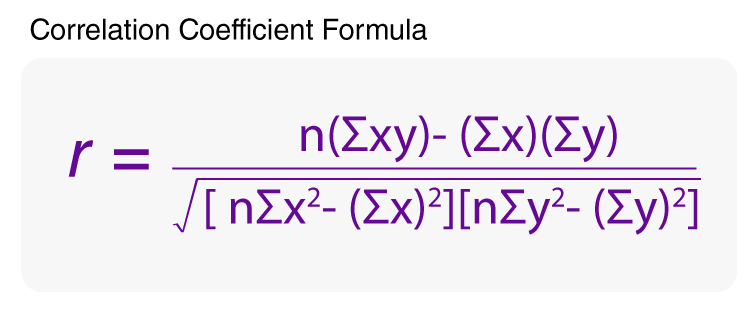

# Regresyonda Çoklu Bağlantı (Multicollinearity) Problemi

* Çoklu bağlantı , regresyon modelindeki bağımsız değişkenler birbiriyle yüksek oranda ilişkili olduğunda gerçekleşir.
* Modelin yorumlanmasını zorlaştırır ve aşırı uyum(overfitting) sorunu yaratır. Değişkenleri regresyon modeline seçmeden önce test edilen yaygın bir varsayımdır.

## Çoklu Bağlantı Problemi Neden Önemlidir ?
* Bağımsız değişkenler yüksek oranda ilişkili olduğunda, bir değişkendeki değişiklik diğerine değişime neden olur ve dolayısıyla model sonuçları önemli ölçüde dalgalanır. Model sonuçları istikrarsız olacaktır ve veriler veya modeldeki küçük bir değişiklik göz önüne alındığında çok farklılık gösterecektir.

* Katsayı Tahminleri kararlı olmayacak ve modeli yorumlamanız zor olacaktır. Başka bir deyişle, tahmin faktörünüzden biri 1 birim değişirse, çıktıdaki değişikliklerin ölçeğini söyleyemezsiniz.

* Modelin dengesiz doğası gereğinden aşırı uyuma(overfitting) neden olabilir. Modeli başka bir veri örneğine uygularsanız, eğitim veri kümenizin doğruluğuna kıyasla doğruluk önemli ölçüde düşer.

* Duruma bağlı olarak, sadece hafif veya orta derecede doğrusallık sorunu ortaya çıkarsa, modeliniz için bir sorun olmayabilir. Bununla birlikte, ciddi bir doğrusallık sorunu varsa, sorunun çözülmesi şiddetle tavsiye edilir (örneğin, 2 değişken arasındaki korelasyon 0.7 veya Varyans Şişirme faktörü (VIF)>10)

# Çoklu Doğrusallığın olup olmadığı nasıl kontrol edilir?

* İlk yöntem değişkenlerin korelasyon matrisine bakıp , korelasyon katsayısı büyük olan değişkenleri belirlemek.

In [ ]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

* Korelasyon matrisini çizdikten ve arka planı renklendirdikten sonra, tüm değişkenler arasındaki ikili korelasyonu görebiliriz. Bağımlı değişken olan 'ORT_DGR' ı da buraya ekledim. Bunun nedeni, modele dahil edilecek bağımsız değişkenleri seçmeye çalıştığımızda bunun daha kolay olmasıdır.

**Modele hangi değişkenlerin dahil edileceği konusunda bilgisiz olduğunuzda, sadece korelasyon matrisi yapın ve bağımlı değişkenle yüksek korelasyonlu bağımsız değişkenleri seçin.**

## VIF Yöntemi
* Çoklu doğrusallığı kontrol etmenin ikinci yöntemi, her bağımsız değişken için Varyans Şişirme Faktörünü (VIF) kullanmaktır. Çoklu regresyon değişkenleri kümesindeki çoklu doğrusallığın bir ölçüsüdür. VIF değeri ne kadar yüksekse, bu değişken ile geri kalanı arasındaki korelasyon o kadar yüksek olur.

In [ ]:
ddf = df.drop("ORT_DGR",axis = 1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = ddf.columns
vif["vif_Factor"] = [variance_inflation_factor(ddf.values, i) for i in range(ddf.shape[1])]
vif

* VIF değeri 10'dan büyükse, genellikle diğer bağımsız değişkenlerle yüksek korelasyona sahip olduğu kabul edilir. Ancak, kabul aralığı gereksinimlere ve kısıtlamalara göre değişebilir. Sonuçlardan, çoğu özelliğin diğer bağımsız değişkenlerle oldukça ilişkili olduğunu ve yalnızca 3 değişkenin 10'un altındaki eşiği geçebildiğini görebiliriz.

# Çoklu Doğrusallık sorunu nasıl çözülür?
* 1- Değişken Seçimi
* 2-Değişken Dönüştürme: İkinci yöntem, bazı değişkenleri daha az ilişkili hale getirmek, ancak yine de özelliklerini korumak için dönüştürmektir. Bununla ne demek isteniyor ? Konut fiyat modeli örneğinde, mevcut yaşı 1970 yılına göre çıkararak evin yaşı inşa edilen yıla dönüştürülebilir. Örneğin, evin yaşı 20  ise, o zaman evin yapılma yılı 1970–20 = 1950'dir.
* 3-Principal Component Analysis(Temel Bileşen Analizi) : Temel Bileşen Analizi (PCA), verileri bağımsız faktörlerin sayısına bölerek verilerin boyutunu azaltmak için yaygın olarak kullanılır. Tahmin faktörlerinin sayısını azaltarak model hesaplamasını basitleştirmek gibi birçok uygulamaya sahiptir. Bununla birlikte, buradaki durumumuzda, modeldeki çoklu doğrusallık sorununu ortadan kaldırmak için PCA için değişken bağımsızlık karakterini kullanacağız.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=14)
components=pca.fit_transform(ddf)
componentsDf=pd.DataFrame(data=components,columns=ddf.columns)
#Oluşturulan yeni DataFrame'nin VIF değerlerinin hesaplanması
vif = pd.DataFrame()
vif["features"] = componentsDf.columns
vif["vif_value"] = [variance_inflation_factor(componentsDf.values, i) for i in range(componentsDf.shape[1])]
vif

* Hala orijinal verilere kıyasla aynı sayıda değişkeni tutuluyor ve şimdi 14 değişkenin birbiriyle hiç ilişkili olmadığını görebiliyoruz. Konut fiyatını tahmin etmek için yeni 14 değişkeni bağımsız değişkenler olarak kullanabiliriz.

**Bu yöntemin dezavantajı da çok açıktır. PCA dönüşümünden sonra her değişken için bir kimliğe sahip değiliz ve sonuçları yorumlamak zor olacak.**

# Sonuç
**Çoklu bağlantı sorununu çözme yöntemleri açısından, PCA en son tercih edilmelidir çünkü model yorumlama kaybolacak ve modeli başka bir veri setine uygulamak istediğinizde tekrar PCA dönüşümü yapmanız gerekecek. Bu nedenle, doğru değişkenleri seçerek ve gerekirse dönüştürerek korelasyonu azaltmak için elimizden gelenin en iyisini yapmalıyız. Göreceli olarak yüksek VIF değerine sahip olduğunda değişkeni tutup tutmayacağınıza karar vermeniz gerekir, ancak aynı zamanda sonucu tahmin etmede önemlidir. Deneme ve yanılma her zaman farklı değişken kümelerini içerme, modeli oluşturma ve herhangi bir aşırı uyum olup olmadığını görmek için test verileriyle test etme durumudur.**

* Değişkenlerin birbirleriyle olan korelasyonları incelendi ve aşağıdaki değişkenler verisetinden çıkarıldı.

In [ ]:
ddf = df.drop(["VERGI","ISLETME_ORAN","NOX"],axis=1)

In [ ]:
ddf.head()

# Aykırı Değerler
* Modelin daha anlamlı olması için verimizde bulunan aykırı değerler tespit edilmeli ve çıkarılmalıdır.
* Bunun için IQR yöntemi uygulanabilir.
## IQR Yöntemi
* Çeyrekler açıklığının 1.5 katı alınarak 3.çeyreklik değerinin eklenip üst eşik değerin,1.çeyreklikten çeyrekler açıklığının çıkarılıp alt eşik değerin elde edildiği yöntemdir.
**Normal dağılıma sahip olmayan verilerde kullanılması daha faydalıdır.**
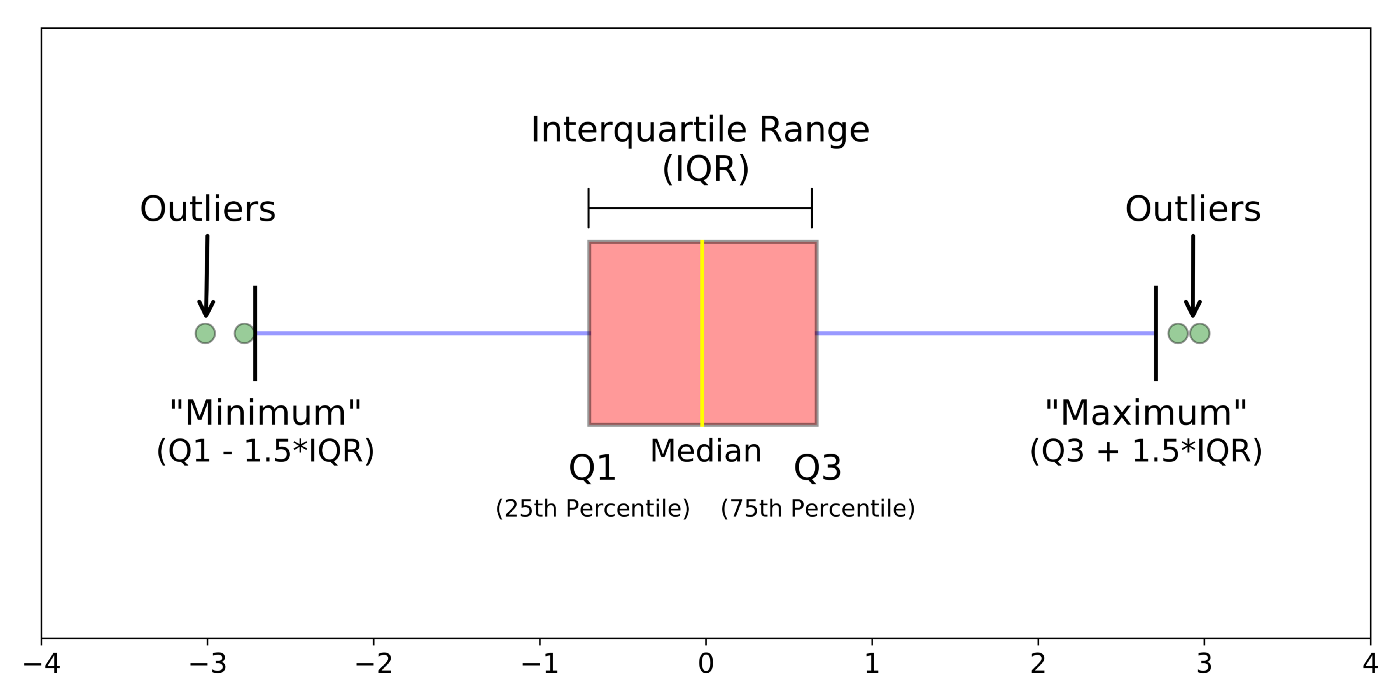


In [ ]:
q3 = ddf["ORT_DGR"].quantile(.75)
q1 = ddf["ORT_DGR"].quantile(.25)
iqr = q3-q1
max = q3+1.5*iqr;min = q1-1.5*iqr;print(min,max)
ddf = ddf[(ddf["ORT_DGR"]>min)&(ddf["ORT_DGR"]<max)]

Alt eşik değer 5.0624,üst eşik değer 36.9625 olarak bulunmuştur ve veri setinden bu değerleri aşan-altında kalan değerler çıkarılmıştır.

# Model Kurulması

In [ ]:

ddf1 = ddf.drop(["ORT_DGR"],axis = 1)
y = ddf["ORT_DGR"]
import statsmodels.api as sm
x = sm.add_constant(ddf1)
model = sm.OLS(y,x).fit();model.summary()

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ddf, y, test_size=0.02, random_state=42)
from sklearn.linear_model import LinearRegression

lr_all = LinearRegression()  
lr_all.fit(X_train, y_train) 

y_pred1=lr_all.predict(X_test)
lr_all.score(X_test, y_test)

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred2 = ridge.predict(X_test)
ridge.score(X_test, y_test)

# Kurulan modelin yorumlanması ve $R^2$
* Çıktıdaki **coef** sütunu Beta parametrelerimizi,**const** değeri B0 sabit parametresini göstermektedir.
* $R^2$ = Kurduğumuz modelde bağımsız değişkenlerin bağımlı değişkeni açıklama oranı olarak söylenebilir.$R^2$ bir olasılık olduğu için 0-1 arasında değer alır.1'e yaklaştıkça modelin gücü artacaktır.

* Adj.$R^2$ = Modele yeni değişken eklediğimizde $R^2$ düşmeyip tam tersi bir şekilde artabilir.Ancak bu durum eklenen değişkenin her zaman modelde bir iyileşme yaptığı anlamına gelmez.En yüksek R-Kare’ye dayanarak seçim yapmak, ilgilenilen nedensel etkileri ortaya çıkaramayan regresyon modellerine neden olabilmektedir. Bu durumda R-Kare’nin modele yeni bir değişken eklendiğinde artmayacak şekilde değiştirilmiş hali olan Düzeltilmiş R-Kare’ye bakarız.

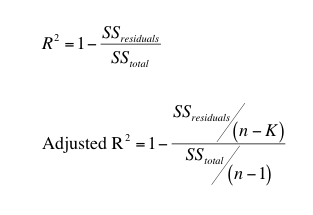

In [ ]:
#Model
print(model.params[0],"+",model.params[1],
      "*X1","+",model.params[2],"*X2","+",model.params[3],
      "*X3","+",model.params[4],"*X4","+",model.params[5],"*X5","+",model.params[6],
      "*X6","+",model.params[7],"*X7","+",model.params[8],"*X8","+",model.params[9],"*X9","+",model.params[10],
      "*X10","+",model.params[11],"*X11")